In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
import math as mt
from math import sqrt
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore')

In [92]:
df = pd.read_csv('C:/Users/Admin/Desktop/Proj1.csv')

In [93]:
Dataset = df.copy()

In [94]:
Dataset.head()  #to get an idea on the features of the dataset

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [95]:
print('Shape of the Dataset before dropping duplicates:',Dataset.shape)

Shape of the Dataset before dropping duplicates: (1100, 14)


In [96]:
#As we could see there are 1100 rows and 14 columns(features) before dropping duplicate

In [97]:
Dataset.info()  #To get an idea of the features which might have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [98]:
#We can see from above execution that Sample ID can be dropped as it has only Null values and also SI No.
#as it is not that useful for Model prediction

In [99]:
Dataset = Dataset.drop(['Sample ID','Sl No'],axis =1)

In [100]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1100 non-null   int64  
 1   Gender                           1100 non-null   object 
 2   inter canine distance intraoral  1100 non-null   float64
 3   intercanine distance casts       1100 non-null   float64
 4   right canine width intraoral     1100 non-null   float64
 5   right canine width casts         1100 non-null   float64
 6   left canine width intraoral      1100 non-null   float64
 7   left canine width casts          1100 non-null   float64
 8   right canine index intra oral    1100 non-null   float64
 9   right canine index casts         1100 non-null   float64
 10  left canine index intraoral      1100 non-null   float64
 11  left canine index casts          1100 non-null   float64
dtypes: float64(10), int6

In [101]:
Dataset= Dataset.drop_duplicates()
print('Shape of the Dataset after dropping duplicates:',Dataset.shape)

Shape of the Dataset after dropping duplicates: (1077, 12)


In [102]:
LE = LabelEncoder()

In [103]:
Dataset['Gender']= LE.fit_transform(Dataset['Gender'])#Applying Categorical encoder coding on Categorical variable GENDER

In [104]:
Dataset.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [105]:
Dataset['Gender'].unique()

array([0, 1])

In [106]:
Dataset.loc[Dataset['Gender'] == 'Male']

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts


In [107]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1077 non-null   int64  
 1   Gender                           1077 non-null   int32  
 2   inter canine distance intraoral  1077 non-null   float64
 3   intercanine distance casts       1077 non-null   float64
 4   right canine width intraoral     1077 non-null   float64
 5   right canine width casts         1077 non-null   float64
 6   left canine width intraoral      1077 non-null   float64
 7   left canine width casts          1077 non-null   float64
 8   right canine index intra oral    1077 non-null   float64
 9   right canine index casts         1077 non-null   float64
 10  left canine index intraoral      1077 non-null   float64
 11  left canine index casts          1077 non-null   float64
dtypes: float64(10), int3

In [108]:
Dataset.shape

(1077, 12)

In [109]:
Dataset.describe()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1077.00000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,21.62117,0.501393,25.981188,25.869842,6.560149,6.561671,6.667604,6.673120,0.253104,0.252319,0.256456,0.256362
std,2.07289,0.500230,1.309747,1.867892,0.378103,0.376608,0.375512,0.376803,0.015395,0.012894,0.012358,0.012374
min,18.00000,0.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,20.00000,0.000000,24.990000,24.970000,6.290000,6.300000,6.400000,6.400000,0.242000,0.242000,0.247000,0.247000
50%,22.00000,1.000000,25.890000,25.890000,6.520000,6.520000,6.660000,6.670000,0.253000,0.253000,0.255000,0.255000
75%,23.00000,1.000000,26.980000,26.980000,6.800000,6.800000,6.900000,6.920000,0.262000,0.261000,0.264000,0.264000
max,25.00000,1.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


Total Male: 540
Total Female: 537


<AxesSubplot:ylabel=' '>

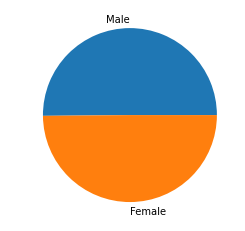

In [110]:
# check for relative proportion 
print("Total Male: " + str(len(Dataset[Dataset['Gender'] == 1])))
print("Total Female: " + str(len(Dataset[Dataset['Gender'] == 0])))


# To see how small are the number of Fraud transactions
data_pi = Dataset.copy()
data_pi[" "] = np.where(data_pi['Gender'] == 1 ,  "Male", "Female")

# plot a pie chart
%matplotlib inline
data_pi[" "].value_counts().plot(kind="pie")

In [111]:
#our data is close to evenly distribution

In [112]:
DF = Dataset.copy()
New_DF = Dataset.copy()

In [113]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [114]:
x = New_DF.drop("Gender",axis = 1)
y= New_DF["Gender"]
bestfeatures = SelectKBest(score_func = chi2,k=7)
fit =bestfeatures.fit(x,y)

In [115]:
feature_scores = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(fit.scores_)],axis = 1)
feature_scores.columns = ["fetaures","scores"]
feature_scores.sort_values(by = 'scores',ascending = False)

,fetaures,scores
6,left canine width casts,9.288489
5,left canine width intraoral,8.943845
1,inter canine distance intraoral,8.051697
3,right canine width intraoral,7.284305
4,right canine width casts,7.228491
2,intercanine distance casts,4.463575
0,Age,3.298344
10,left canine index casts,0.096843
9,left canine index intraoral,0.095045
8,right canine index casts,0.063348


In [116]:
feature_scores.nlargest(7,'scores')

,fetaures,scores
6,left canine width casts,9.288489
5,left canine width intraoral,8.943845
1,inter canine distance intraoral,8.051697
3,right canine width intraoral,7.284305
4,right canine width casts,7.228491
2,intercanine distance casts,4.463575
0,Age,3.298344


In [117]:
Highly_Related_Features = feature_scores.nlargest(3,'scores')
print('Highly Related Features which can be removed:',Highly_Related_Features)

Highly Related Features which can be removed:                           fetaures    scores
6          left canine width casts  9.288489
5      left canine width intraoral  8.943845
1  inter canine distance intraoral  8.051697


In [118]:
New_DF = New_DF.drop(['left canine width casts','left canine width intraoral','inter canine distance intraoral'],axis =1)

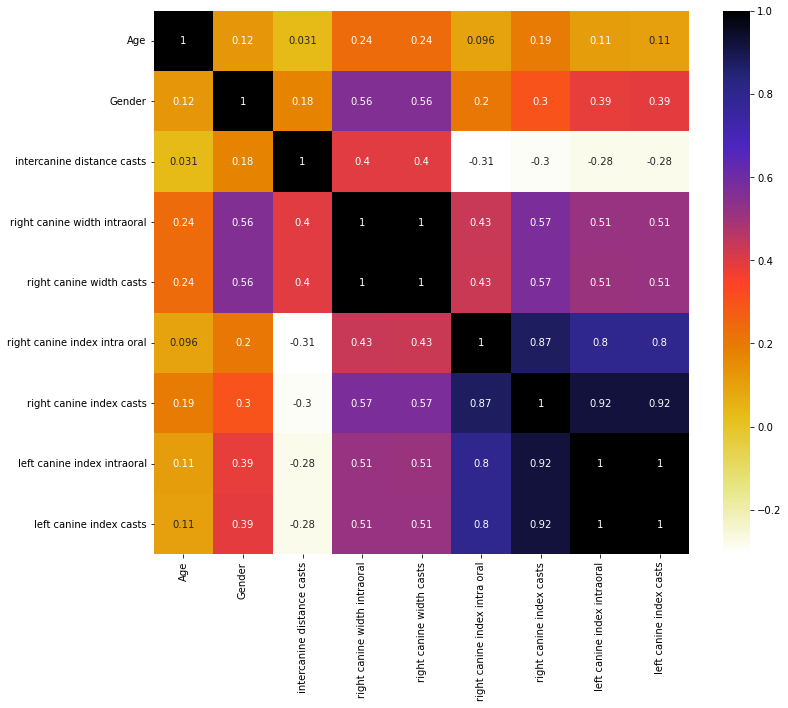

In [119]:
plt.figure(figsize = (12,10))
sns.heatmap(New_DF.corr(), annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [120]:
#After performing Chi square tests we could see still we have some highlt correlated feature.
#Hence we need to perform Correlation

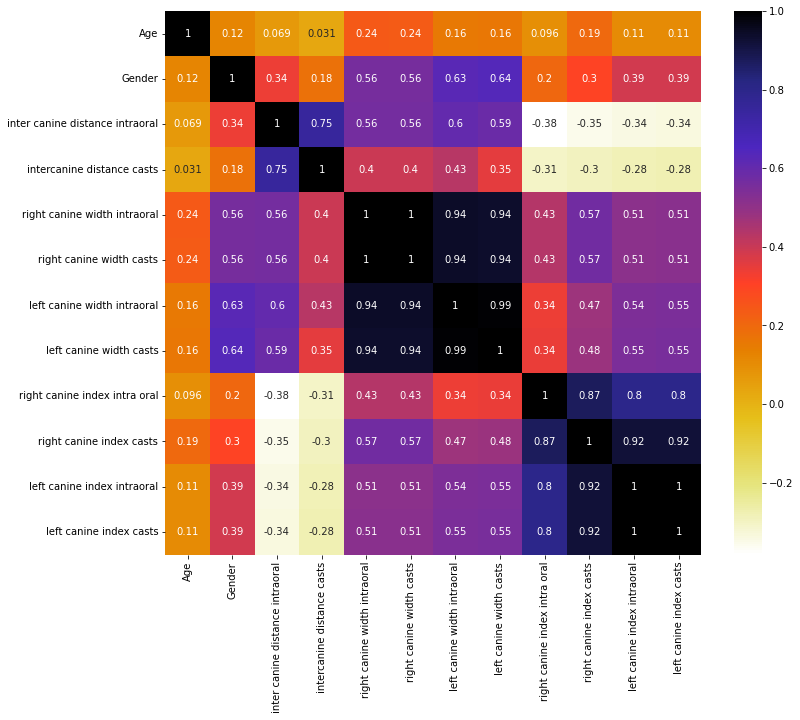

In [121]:
plt.figure(figsize = (12,10))
sns.heatmap(DF.corr(), annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [122]:
#DF.corr()

In [123]:
def correlation(dataset,Threshold):
    col_corr= set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>Threshold:
                columname = corr_matrix.columns[i]
                col_corr.add(columname)
    return col_corr   

In [124]:
correlated_features = correlation(DF,0.95)
print('No. of High Co-related features:',len(correlated_features))
print('Highly co-related Features are:',correlated_features)

No. of High Co-related features: 3
Highly co-related Features are: {'left canine width casts', 'left canine index casts', 'right canine width casts'}


In [125]:
#left canine index casts,right canine width casts and left canine width casts can be dropped from the features for better predictio
#due to their high collinerity

DF = DF.drop(['left canine index casts','left canine width casts','right canine width casts'],axis =1)

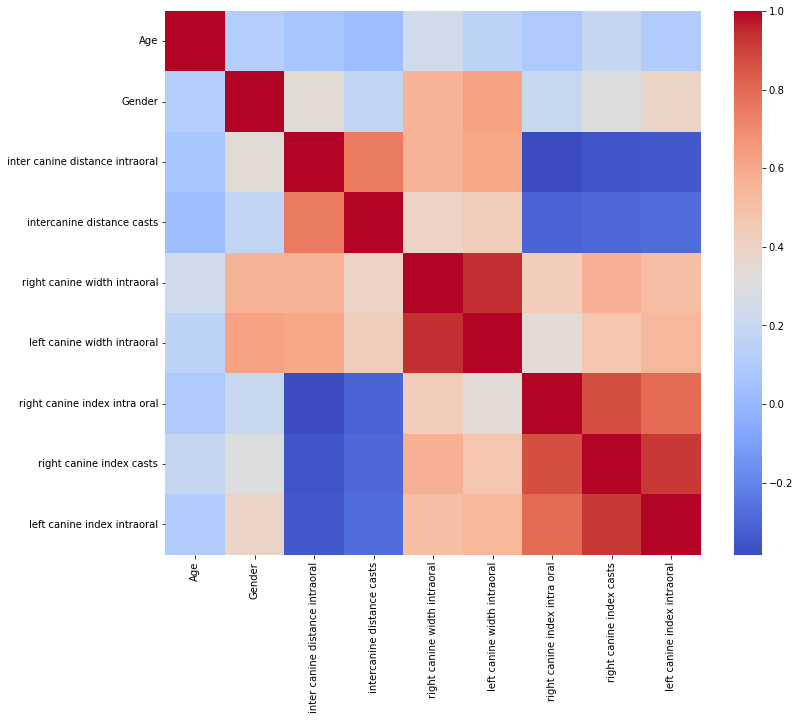

In [126]:
plt.figure(figsize = (12,10))
sns.heatmap(DF.corr(),  cmap = 'coolwarm')
plt.show()

In [127]:
#Shape of Dataset before removing outliers
DF.shape

(1077, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x249c4bd9af0>,
 'caps': [<matplotlib.lines.Line2D at 0x249c4bd9ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249c4bd9c10>],
 'medians': [<matplotlib.lines.Line2D at 0x249c4ca4910>],
 'fliers': [<matplotlib.lines.Line2D at 0x249c4ca4610>],
 'means': []}

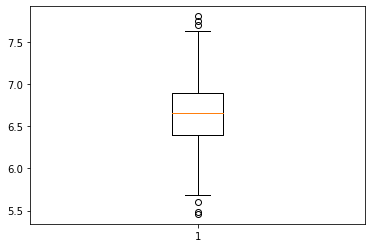

In [128]:
plt.boxplot(DF['left canine width intraoral'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'inter canine distance intraoral'),
  Text(3, 0, 'intercanine distance casts'),
  Text(4, 0, 'right canine width intraoral'),
  Text(5, 0, 'left canine width intraoral'),
  Text(6, 0, 'right canine index intra oral'),
  Text(7, 0, 'right canine index casts'),
  Text(8, 0, 'left canine index intraoral')])

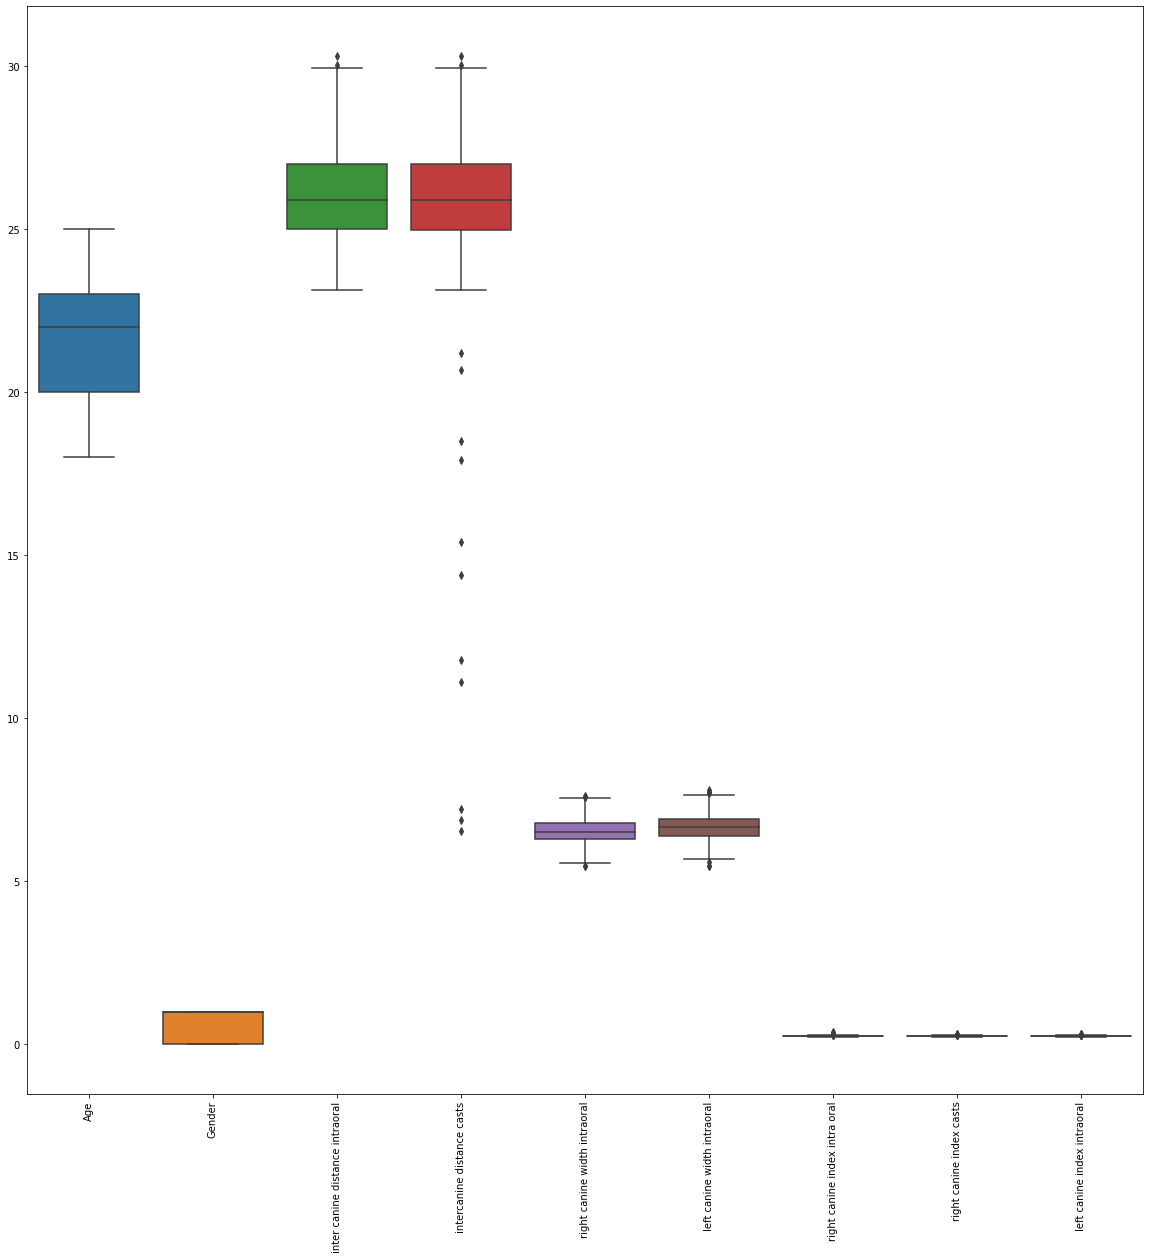

In [129]:
plt.figure(figsize=(20,20)) 
sns.boxplot(data=DF)
plt.xticks(rotation=90)

In [130]:
DF.quantile([.25,.5,.75],axis = 0)

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,left canine width intraoral,right canine index intra oral,right canine index casts,left canine index intraoral
0.25,20.0,0.0,24.99,24.97,6.29,6.40,0.242,0.242,0.247
0.50,22.0,1.0,25.89,25.89,6.52,6.66,0.253,0.253,0.255
0.75,23.0,1.0,26.98,26.98,6.80,6.90,0.262,0.261,0.264


In [131]:
DF.describe()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,left canine width intraoral,right canine index intra oral,right canine index casts,left canine index intraoral
count,1077.00000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,21.62117,0.501393,25.981188,25.869842,6.560149,6.667604,0.253104,0.252319,0.256456
std,2.07289,0.500230,1.309747,1.867892,0.378103,0.375512,0.015395,0.012894,0.012358
min,18.00000,0.000000,23.120000,6.540000,5.460000,5.460000,0.223000,0.223000,0.223000
25%,20.00000,0.000000,24.990000,24.970000,6.290000,6.400000,0.242000,0.242000,0.247000
50%,22.00000,1.000000,25.890000,25.890000,6.520000,6.660000,0.253000,0.253000,0.255000
75%,23.00000,1.000000,26.980000,26.980000,6.800000,6.900000,0.262000,0.261000,0.264000
max,25.00000,1.000000,30.310000,30.310000,7.610000,7.810000,0.363000,0.302000,0.305000


In [132]:
colom = DF.columns
colom

Index(['Age', 'Gender', 'inter canine distance intraoral',
       'intercanine distance casts', 'right canine width intraoral',
       'left canine width intraoral', 'right canine index intra oral',
       'right canine index casts', 'left canine index intraoral'],
      dtype='object')

In [133]:
IQR = DF['inter canine distance intraoral'].quantile(0.75) - DF['inter canine distance intraoral'].quantile(0.25)
Upper_Limit = DF['inter canine distance intraoral'].quantile(0.75) + 1.5 * IQR
Lower_Limit = DF['inter canine distance intraoral'].quantile(0.25) - 1.5 * IQR

print('IQR is:',IQR)
print('Upper Limit is:',Upper_Limit)
print('Lower Limit is:',Lower_Limit)

IQR is: 1.990000000000002
Upper Limit is: 29.965000000000003
Lower Limit is: 22.004999999999995


In [134]:
Data = DF['inter canine distance intraoral']

In [135]:
outlier = []
for x in Data:
    if (x>Upper_Limit) or (x<Lower_Limit):
        outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [30.31, 30.03]


In [136]:
def outliers(df,field):
    IQR = df[field].quantile(0.75) - df[field].quantile(0.25)
    Upper_Limit = df[field].quantile(0.65) + 1.5 * IQR
    Lower_Limit = df[field].quantile(0.25) - 1.5 * IQR
    ls = df.index[(df[field]<Lower_Limit) | (df[field]>Upper_Limit)]
    return ls

index_list = []

for feature in colom:
    index_list.extend(outliers(DF,feature))



In [137]:
index_list 

[66,
 760,
 762,
 66,
 90,
 760,
 762,
 1000,
 1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 45,
 54,
 61,
 559,
 691,
 700,
 705,
 710,
 712,
 715,
 717,
 731,
 736,
 767,
 45,
 54,
 61,
 550,
 559,
 640,
 641,
 644,
 645,
 649,
 666,
 691,
 700,
 710,
 712,
 715,
 717,
 731,
 34,
 57,
 422,
 423,
 428,
 441,
 442,
 444,
 446,
 447,
 485,
 613,
 673,
 677,
 679,
 686,
 692,
 693,
 706,
 57,
 613,
 671,
 673,
 677,
 679,
 686,
 692,
 693,
 706,
 57,
 62,
 613,
 671,
 673,
 677,
 679,
 686,
 692,
 693,
 706,
 721,
 723,
 724,
 725,
 728,
 729,
 739]

In [138]:
def remove_outliers(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [139]:
DF = remove_outliers(DF,index_list)

In [140]:
#Shape of dataset after removing outliers
DF.shape

(1014, 9)

In [141]:
#check = 30.31
#check

In [142]:
#if check not in DF.values :
#    print("\nFor Loop worked")
#else :
#    print("\nFor Loop failed")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'inter canine distance intraoral'),
  Text(3, 0, 'intercanine distance casts'),
  Text(4, 0, 'right canine width intraoral'),
  Text(5, 0, 'left canine width intraoral'),
  Text(6, 0, 'right canine index intra oral'),
  Text(7, 0, 'right canine index casts'),
  Text(8, 0, 'left canine index intraoral')])

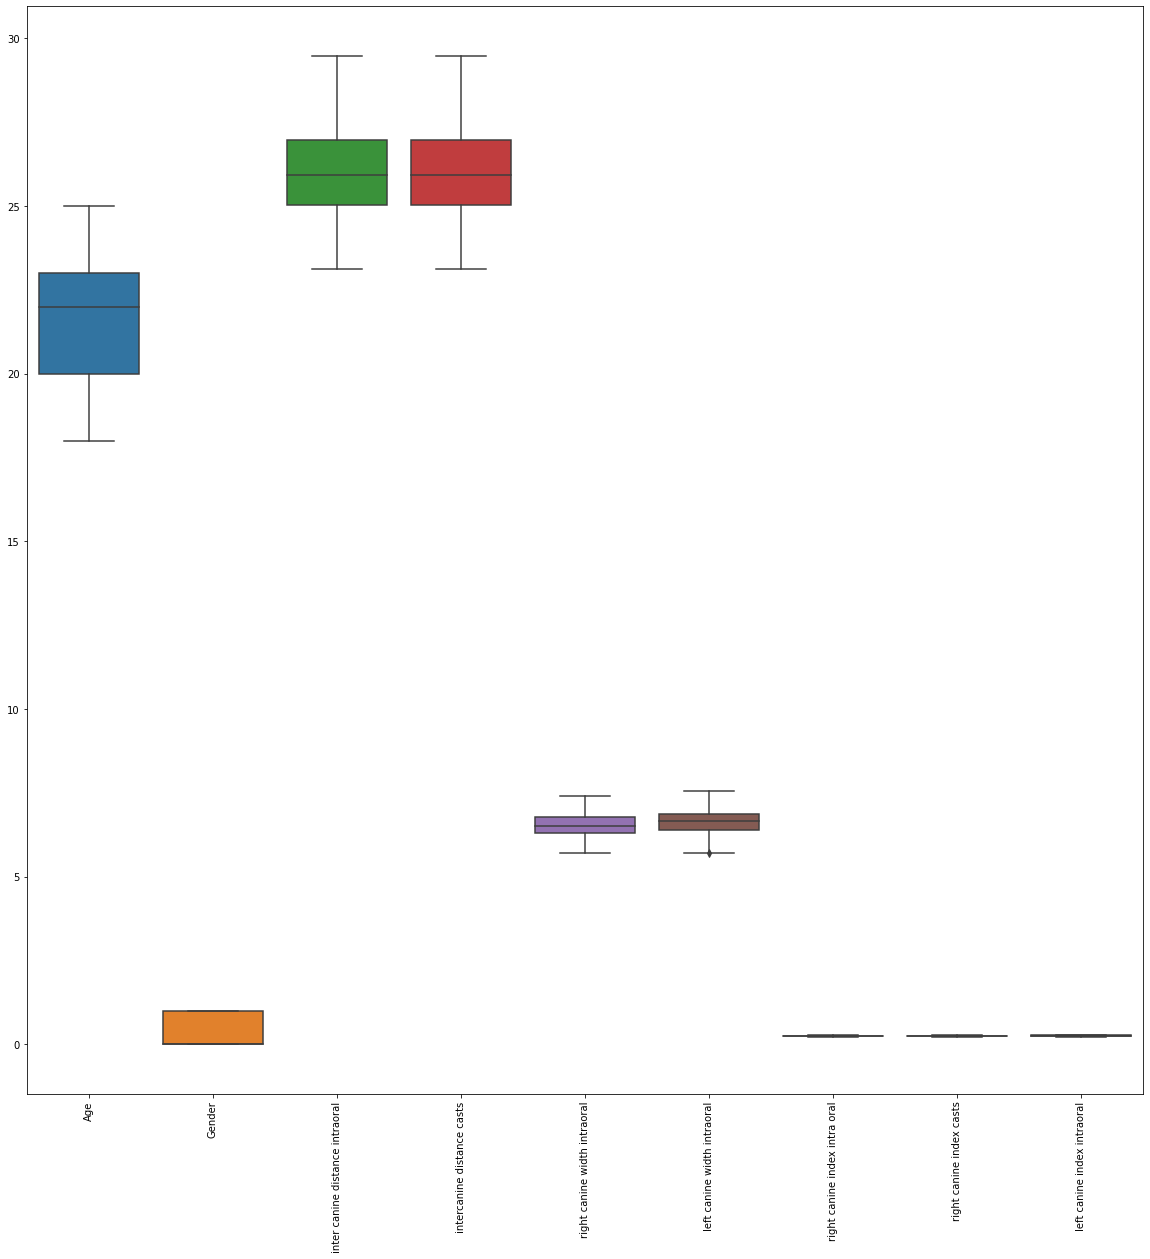

In [143]:
plt.figure(figsize=(20,20)) 
sns.boxplot(data=DF)
plt.xticks(rotation=90)

In [144]:
X = DF.drop('Gender',axis = 1)
y = DF['Gender']

In [145]:
X.shape

(1014, 8)

In [146]:
y.shape

(1014,)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [148]:
X_train.shape

(760, 8)

In [149]:
X_test.shape

(254, 8)

In [150]:
y_train.shape

(760,)

In [151]:
y_test.shape

(254,)

In [152]:
y_test.head()

921    1
50     1
372    0
563    0
157    0
Name: Gender, dtype: int32

In [153]:
scaler = StandardScaler()
scaler

StandardScaler()

In [154]:
train_vars = X_train.columns


X_train[train_vars] = scaler.fit_transform(X_train[train_vars])
X_test[train_vars] = scaler.transform(X_test[train_vars])

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [155]:
X_train.head()

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,left canine width intraoral,right canine index intra oral,right canine index casts,left canine index intraoral
868,-0.311736,-1.306066,-1.307239,-0.199991,0.837722,1.116140,1.121704,2.571718
160,-0.311736,1.045920,1.075871,-0.679196,0.093114,-1.784625,-1.785284,-1.014531
990,-0.311736,1.261187,1.259187,1.491324,1.210026,0.453108,0.457250,0.122572
414,0.169808,-0.947288,-0.948577,0.194650,-0.107358,1.199019,1.204761,0.909798
281,1.132895,1.524291,1.522206,1.463135,1.210026,0.121592,0.125022,-0.314775


In [156]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso,LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import  xgboost as xgb
from xgboost import XGBClassifier,plot_importance
import io
import time

In [157]:
df_results = pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])

In [158]:
#plot common function to plot confusion matrix
def plot_confusion_matrix(y_test,pred_test):
  cm = confusion_matrix(y_test,pred_test)
  plt.clf()
  plt.imshow(cm,interpolation = 'nearest', cmap = plt.cm.Accent)
  categoryNames = ['Male','Female']
  plt.title = ('Confusion Matrix -Test Data')
  plt.ylabel = ('True Data')
  plt.xlabel = ('Predicted Data')
  ticks = np.arange(len(categoryNames))  #which is 2 in this case as it has 2 values
  plt.xticks(ticks, categoryNames, rotation = 45)
  plt.yticks(ticks, categoryNames,)
  s = [['TN','FP'],['FN','TP']]

  for i in range(2):
    for j in range(2):
      plt.text(j,i, str(s[i][j])+ ' = '+str(cm[i][j]),fontsize =14)
  plt.show()

In [159]:
#Create a common function to fit and predict on a logistic regression model for both L1 and L2

def build_and_run_logisticmodels(df_results,Methodology,X_train, X_test, y_train, y_test):
  from sklearn import linear_model
  from sklearn.model_selection import KFold
  num_C =list(np.power(10.0, np.arange(-10,10)))
  cv_num= KFold(n_splits= 10, shuffle= True, random_state=42)

  SearchCV_l2 = linear_model.LogisticRegressionCV(Cs = num_C,penalty ='l2',scoring = 'roc_auc',cv = cv_num,random_state= 42,max_iter =10000,fit_intercept = True,solver = 'newton-cg',tol =10)
  SearchCV_l1 = linear_model.LogisticRegressionCV(Cs = num_C,penalty ='l1',scoring = 'roc_auc',cv = cv_num,random_state= 42,max_iter =10000,fit_intercept = True,solver = 'liblinear',tol =10)

  #train the model
  SearchCV_l2.fit(X_train,y_train)
  SearchCV_l1.fit(X_train,y_train)
  print ('Max auc_roc for l1:', SearchCV_l1.scores_[1].mean(axis = 0).max())
  print ('Max auc_roc for l2:', SearchCV_l2.scores_[1].mean(axis = 0).max())
  

  print('parameters for L1 regularistions')
  print(SearchCV_l1.coef_)
  print(SearchCV_l1.intercept_)
  print(SearchCV_l1.score)

  print('parameters for L2 regularistions')
  print(SearchCV_l2.coef_)
  print(SearchCV_l2.intercept_)
  print(SearchCV_l2.score)

  #find predicted values
  y_pred_l1 = SearchCV_l1.predict(X_test)
  y_pred_l2 = SearchCV_l2.predict(X_test)

  #find predicted probabilities
  y_pred_l1_prob_predict = SearchCV_l1.predict_proba(X_test)[:,1]
  y_pred_l2_prob_predict = SearchCV_l2.predict_proba(X_test)[:,1]
  
  #Accuracy score of L1/L2 model
  Accuracy_l2 = metrics.accuracy_score(y_pred =y_pred_l2 ,y_true = y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred =y_pred_l1 ,y_true = y_test)

  print('Accuracy of logistic model with L2 regulrisation: {0}',format(Accuracy_l2))
  print('confusion Matrix')
  plot_confusion_matrix(y_test,y_pred_l2)
  print('Classification Report')
  print(classification_report(y_test,y_pred_l2))

  print('Accuracy of logistic model with L1 regulrisation: {0}',format(Accuracy_l1))
  print('confusion Matrix')
  plot_confusion_matrix(y_test,y_pred_l1)
  print('Classification Report')
  print(classification_report(y_test,y_pred_l1))

  l2_roc_value = roc_auc_score(y_test,y_pred_l2_prob_predict)
  print('L2 ROC VALUE:{0}'.format(l2_roc_value))
  fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_l2_prob_predict)
  Threshold2 = thresholds[np.argmax(fpr-tpr)]
  print('L2 Threshold value:{0}'.format(Threshold2))

  roc_auc = metrics.auc(fpr,tpr)
  print('ROC of the test dataset','{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label = 'test, auc=' +str(roc_auc))
  plt.legend(loc =4)
  plt.show

  df_results =df_results.append(pd.DataFrame({'Methodology': Methodology, 'Model':'Logistic Regression with L2 Regularistion','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold':Threshold2}, index = [0]), ignore_index = True)
  
  l1_roc_value = roc_auc_score(y_test,y_pred_l1_prob_predict)
  print('L1 ROC VALUE:{0}'.format(l1_roc_value))
  fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_l1_prob_predict)
  Threshold1 = thresholds[np.argmax(fpr-tpr)]
  print('L1 Threshold value:{0}'.format(Threshold1))

  roc_auc = metrics.auc(fpr,tpr)
  print('ROC of the test dataset','{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label = 'test, auc=' +str(roc_auc))
  plt.legend(loc =4)
  plt.show

  df_results =df_results.append(pd.DataFrame({'Methodology': Methodology, 'Model':'Logistic Regression with L1 Regularistion','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold':Threshold1}, index = [0]), ignore_index = True)
  
  return df_results
  

In [160]:
def build_and_run_KNNmodels(df_results,Methodology,X_train,y_train, X_test, y_test):
  KNN = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
  KNN.fit(X_train,y_train)
  y_pred = KNN.predict(X_test)
  score = KNN.score(X_test,y_test)
  print('Model score')
  print(score)

  #Accuracy
  KNN_Accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_pred)
  print('Classification report')
  print(classification_report(y_test, y_pred))

  #Fetching Probility
  KNN_Probabs = KNN.predict_proba(X_test)[:,1]

  #CALCULATE ROC_AUC
  KNN_ROC_VALUE = roc_auc_score(y_test,KNN_Probabs)
  print('KNN ROC_AUC value: {0}'.format(KNN_ROC_VALUE))
  fpr,tpr,thresholds = metrics.roc_curve(y_test,KNN_Probabs)
  THRESHOLD_KNN = thresholds[np.argmax(tpr-fpr)]
  print('knn threshold value: {0}'.format(THRESHOLD_KNN))

  roc_auc = metrics.auc(fpr,tpr)
  print('ROC for the test dataset', '{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label = 'Test, AUC='+str(roc_auc))
  plt.legend(loc = 4)
  plt.show()
  
  df_results =df_results.append(pd.DataFrame({'Methodology': Methodology, 'Model':'KNN','Accuracy': KNN_Accuracy,'roc_value': KNN_ROC_VALUE,'threshold':THRESHOLD_KNN}, index = [0]), ignore_index = True)
  
  return df_results


In [161]:
#Create a common function to fit and predict on a Tree models for both Gini and Entropy criteria

def build_and_run_Treemodels(df_results,Methodology,X_train,y_train, X_test, y_test):
  
  #Evaluate tree model based on based on 'gini' and 'Entropy'
  criteria = ['gini','entropy']
  scores = {}
  for c in criteria:
    DT = DecisionTreeClassifier(criterion=c, random_state=42)
    DT.fit(X_train,y_train)
    y_pred = DT.predict(X_test)
    score = DT.score(X_test,y_test)
    DT_Probabs = DT.predict_proba(X_test)[:,1]
    

    #Accuracy
    print(c+ 'Model score: {0}'.format(score))
    print('Confusion Matrix')
    plot_confusion_matrix(y_test,y_pred)
    print('Classification report')
    print(classification_report(y_test, y_pred))
    #CALCULATE ROC_AUC
    Decisiontree_ROC_VALUE = roc_auc_score(y_test,DT_Probabs)
    print('Decisiontree ROC_AUC value: {0}'.format(Decisiontree_ROC_VALUE))
    fpr,tpr,thresholds = metrics.roc_curve(y_test,DT_Probabs)
    THRESHOLD_Decisiontree = thresholds[np.argmax(tpr-fpr)]
    print('Decisiontree threshold value: {0}'.format(THRESHOLD_Decisiontree))

    roc_auc = metrics.auc(fpr,tpr)
    print('ROC for the test dataset', '{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label = 'Test, AUC='+str(roc_auc))
    plt.legend(loc = 4)
    plt.show()
  
    df_results =df_results.append(pd.DataFrame({'Methodology': Methodology, 'Model':'Tree Model with {0} criteria '.format(c),'Accuracy': score,'roc_value': Decisiontree_ROC_VALUE,'threshold':THRESHOLD_Decisiontree}, index = [0]), ignore_index = True)
  
  return df_results


In [162]:
#Create a common function to fit and predict on a Random Forest  models 

def build_and_run_RFmodels(df_results,Methodology,X_train,y_train, X_test, y_test):
    
    #CREATE THE MODEL WITH 100 TREES

    RFM = RandomForestClassifier(n_estimators=100, max_features="sqrt", bootstrap=True, random_state=42)
    RFM.fit(X_train,y_train)
    RFM_Score = RFM.score(X_test,y_test)
    y_pred = RFM.predict(X_test)
    RFM_pred_prob = RFM.predict_proba(X_test)[:,1]
    
    #Accuracy
    print('Model score: {0}'.format(RFM_Score))
    print('Confusion Matrix')
    plot_confusion_matrix(y_test,y_pred)
    print('Classification Report')
    print(classification_report(y_test, y_pred))

    #ROC_AUC
    RFM_ROC_VALUE = roc_auc_score(y_test,RFM_pred_prob)
    print('Random Forest tree ROC_AUC value: {0}'.format(RFM_ROC_VALUE))
    fpr,tpr,thresholds = metrics.roc_curve(y_test,RFM_pred_prob)
    THRESHOLD_RFM = thresholds[np.argmax(tpr-fpr)]
    print('Random Forest tree threshold value: {0}'.format(THRESHOLD_RFM))

    roc_auc = metrics.auc(fpr,tpr)
    print('ROC for the test dataset', '{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label = 'Test, AUC='+str(roc_auc))
    plt.legend(loc = 4)
    plt.show()  
  
    df_results =df_results.append(pd.DataFrame({'Methodology': Methodology, 'Model':'Random Forest','Accuracy': RFM_Score,'roc_value': RFM_ROC_VALUE,'threshold':THRESHOLD_RFM}, index = [0]), ignore_index = True)

    return df_results





In [163]:
#Create a common function to fit and predict on a Random Forest  models 

def build_and_run_RFmodels(df_results,Methodology,X_train,y_train, X_test, y_test):
    
    #CREATE THE MODEL WITH 100 TREES

    RFM = RandomForestClassifier(n_estimators=100, max_features="sqrt", bootstrap=True, random_state=42)
    RFM.fit(X_train,y_train)
    RFM_Score = RFM.score(X_test,y_test)
    y_pred = RFM.predict(X_test)
    RFM_pred_prob = RFM.predict_proba(X_test)[:,1]
    
    #Accuracy
    print('Model score: {0}'.format(RFM_Score))
    print('Confusion Matrix')
    plot_confusion_matrix(y_test,y_pred)
    print('Classification Report')
    print(classification_report(y_test, y_pred))

    #ROC_AUC
    RFM_ROC_VALUE = roc_auc_score(y_test,RFM_pred_prob)
    print('Random Forest tree ROC_AUC value: {0}'.format(RFM_ROC_VALUE))
    fpr,tpr,thresholds = metrics.roc_curve(y_test,RFM_pred_prob)
    THRESHOLD_RFM = thresholds[np.argmax(tpr-fpr)]
    print('Random Forest tree threshold value: {0}'.format(THRESHOLD_RFM))

    roc_auc = metrics.auc(fpr,tpr)
    print('ROC for the test dataset', '{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label = 'Test, AUC='+str(roc_auc))
    plt.legend(loc = 4)
    plt.show()  
  
    df_results =df_results.append(pd.DataFrame({'Methodology': Methodology, 'Model':'Random Forest','Accuracy': RFM_Score,'roc_value': RFM_ROC_VALUE,'threshold':THRESHOLD_RFM}, index = [0]), ignore_index = True)

    return df_results





In [164]:
#Create a common function to fit and predict on a Random Forest  models 

def build_and_run_RFmodels(df_results,Methodology,X_train,y_train, X_test, y_test):
    
    #CREATE THE MODEL WITH 100 TREES

    RFM = RandomForestClassifier(n_estimators=100, max_features="sqrt", bootstrap=True, random_state=42)
    RFM.fit(X_train,y_train)
    RFM_Score = RFM.score(X_test,y_test)
    y_pred = RFM.predict(X_test)
    RFM_pred_prob = RFM.predict_proba(X_test)[:,1]
    
    #Accuracy
    print('Model score: {0}'.format(RFM_Score))
    print('Confusion Matrix')
    plot_confusion_matrix(y_test,y_pred)
    print('Classification Report')
    print(classification_report(y_test, y_pred))

    #ROC_AUC
    RFM_ROC_VALUE = roc_auc_score(y_test,RFM_pred_prob)
    print('Random Forest tree ROC_AUC value: {0}'.format(RFM_ROC_VALUE))
    fpr,tpr,thresholds = metrics.roc_curve(y_test,RFM_pred_prob)
    THRESHOLD_RFM = thresholds[np.argmax(tpr-fpr)]
    print('Random Forest tree threshold value: {0}'.format(THRESHOLD_RFM))

    roc_auc = metrics.auc(fpr,tpr)
    print('ROC for the test dataset', '{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label = 'Test, AUC='+str(roc_auc))
    plt.legend(loc = 4)
    plt.show()  
  
    df_results =df_results.append(pd.DataFrame({'Methodology': Methodology, 'Model':'Random Forest','Accuracy': RFM_Score,'roc_value': RFM_ROC_VALUE,'threshold':THRESHOLD_RFM}, index = [0]), ignore_index = True)

    return df_results





In [165]:
# Created a common function to fit and predict on a XGBoost model
def buildAndRunXGBoostModels(df_Results, Methodology,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results


In [166]:
# Created a common function to fit and predict on a SVM model
def buildAndRunSVMModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))

  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.862104063315692
parameters for L1 regularistions
[[0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
<bound method LogisticRegressionCV.score of LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     cv=KFold(n_splits=10, random_state=42, shuffle=True),
                     max_iter=10000, penalty='l1', random_state=42,
                     scoring='roc_auc', solver='liblinear', tol=10)>
parameters for L2 regularistions
[[-0.00899176  0.27063558  0.25147351  0.0629871   1.04796586 -0.14435461
  -0.21665764  1.00398084]]
[0.06407252]
<bound method LogisticRegressionCV.score of LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.0

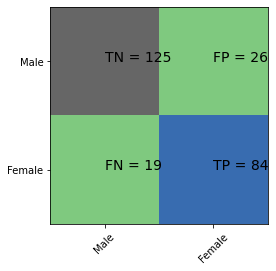

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       151
           1       0.76      0.82      0.79       103

    accuracy                           0.82       254
   macro avg       0.82      0.82      0.82       254
weighted avg       0.83      0.82      0.82       254

Accuracy of logistic model with L1 regulrisation: {0} 0.594488188976378
confusion Matrix


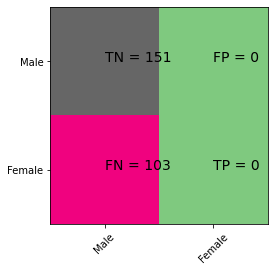

Classification Report
              precision    recall  f1-score   support

           0       0.59      1.00      0.75       151
           1       0.00      0.00      0.00       103

    accuracy                           0.59       254
   macro avg       0.30      0.50      0.37       254
weighted avg       0.35      0.59      0.44       254

L2 ROC VALUE:0.8855526265029254
L2 Threshold value:1.9876109642073054
ROC of the test dataset 88.6%
L1 ROC VALUE:0.5
L1 Threshold value:1.5
ROC of the test dataset 50.0%
Time Taken by Model: --- 2.2832231521606445 seconds ---
------------------------------------------------------------
KNN Model
Model score
0.937007874015748
Classification report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.92      0.92      0.92       103

    accuracy                           0.94       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.94      0

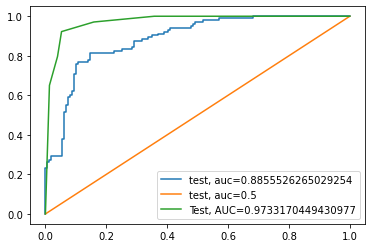

Time Taken by Model: --- 0.7876918315887451 seconds ---
------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
giniModel score: 0.8976377952755905
Confusion Matrix


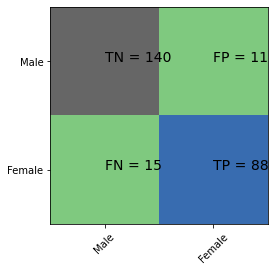

Classification report
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       151
           1       0.89      0.85      0.87       103

    accuracy                           0.90       254
   macro avg       0.90      0.89      0.89       254
weighted avg       0.90      0.90      0.90       254

Decisiontree ROC_AUC value: 0.8907606249598148
Decisiontree threshold value: 1.0
ROC for the test dataset 89.1%


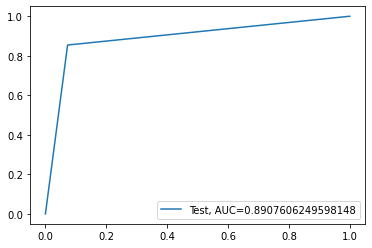

entropyModel score: 0.8700787401574803
Confusion Matrix


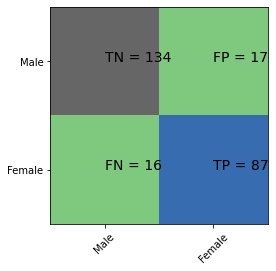

Classification report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       151
           1       0.84      0.84      0.84       103

    accuracy                           0.87       254
   macro avg       0.86      0.87      0.87       254
weighted avg       0.87      0.87      0.87       254

Decisiontree ROC_AUC value: 0.8660387063589018
Decisiontree threshold value: 1.0
ROC for the test dataset 86.6%


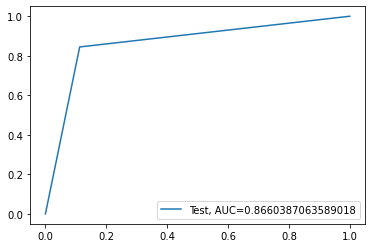

Time Taken by Model: --- 1.650604009628296 seconds ---
------------------------------------------------------------
Random Forest Model
Model score: 0.9094488188976378
Confusion Matrix


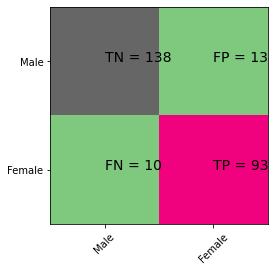

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       151
           1       0.88      0.90      0.89       103

    accuracy                           0.91       254
   macro avg       0.90      0.91      0.91       254
weighted avg       0.91      0.91      0.91       254

Random Forest tree ROC_AUC value: 0.9698771941104609
Random Forest tree threshold value: 0.55
ROC for the test dataset 97.0%


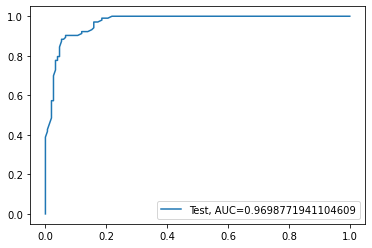

Time Taken by Model: --- 0.9085140228271484 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9015748031496063
Confusion Matrix


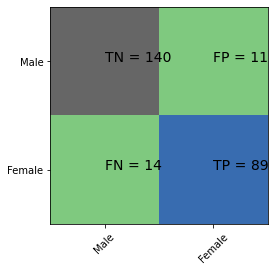

classification Report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       151
           1       0.89      0.86      0.88       103

    accuracy                           0.90       254
   macro avg       0.90      0.90      0.90       254
weighted avg       0.90      0.90      0.90       254

XGboost roc_value: 0.9629010480293192
XGBoost threshold: 0.30017977952957153
ROC for the test dataset 96.3%


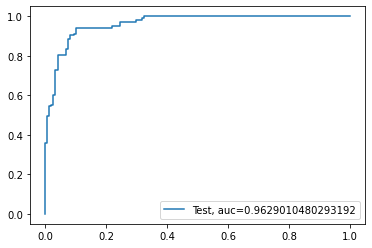

Time Taken by Model: --- 0.6755087375640869 seconds ---
------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.6929133858267716
Confusion Matrix


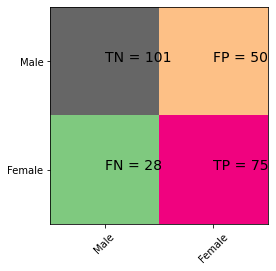

classification Report
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       151
           1       0.60      0.73      0.66       103

    accuracy                           0.69       254
   macro avg       0.69      0.70      0.69       254
weighted avg       0.71      0.69      0.70       254

SVM roc_value: 0.7749630296405838
SVM threshold: 0.6210674696595203
ROC for the test dataset 77.5%


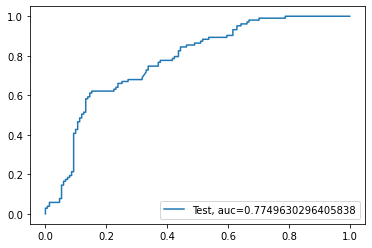

Time Taken by Model: --- 0.6892950534820557 seconds ---


In [167]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_results = build_and_run_logisticmodels(df_results,'Result for Logistic',X_train, X_test,y_train, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_results = build_and_run_KNNmodels(df_results,'Result for KNN',X_train,y_train,X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_results = build_and_run_Treemodels(df_results,'Result for Decision Tree',X_train,y_train,X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_results = build_and_run_RFmodels(df_results,'Result for Random Forest',X_train,y_train,X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_results = buildAndRunXGBoostModels(df_results,'XGBoost',X_train,y_train,X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_results = buildAndRunSVMModels(df_results,'Result for SVM Model',X_train,y_train,X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [168]:
df1 = df_results
df1

,Methodology,Model,Accuracy,roc_value,threshold
0,Result for Logistic,Logistic Regression with L2 Regularistion,0.822835,0.885553,1.987611
1,Result for Logistic,Logistic Regression with L1 Regularistion,0.594488,0.500000,1.500000
2,Result for KNN,KNN,0.937008,0.973317,0.600000
3,Result for Decision Tree,Tree Model with gini criteria,0.897638,0.890761,1.000000
4,Result for Decision Tree,Tree Model with entropy criteria,0.870079,0.866039,1.000000
5,Result for Random Forest,Random Forest,0.909449,0.969877,0.550000
6,XGBoost,XGBoost,0.901575,0.962901,0.300180
7,Result for SVM Model,SVM,0.692913,0.774963,0.621067
